In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from numba import njit
import matplotlib.image as img

In this chapter we will explore the possibilities of the "Perceptron". The perceptron is practically a linear association with the addition that we want to classify our results. This is why we add a "threshold" to the calculations. If the result exceeds the threshold, we will classify the result as -1 and if the result is below the threshold, we will classify the result as 1.

More specifically, we will train our algorithm to decide if a given vector's length is greater or smaller than 1. If it is smaller than one, we classify this as 1 and if it is equal to or greater than 1, we will classify this as -1. 

We will see that the perceptron has some limitations, because decisions are based on the dot product of a weight vector "w" and a some training vectors "x_train". For convenience, we will normalize w throughout the calculations. This makes the explanation of why the perceptron is limited easier, too.

The dot product of two vectors w and z is dot(w,z) = |w|*|z|*cos(alpha), where alpha is the angle between w and z. If |w| = 1, this is nothing but dot(w, z) = |z|*cos(alpha) and this is nothing but the scalr projection of z onto w (see here, if you are not too familiar with this https://en.wikipedia.org/wiki/Dot_product#Scalar_projection_and_first_properties ). This means that if we make decisions based on whether dot(w,z) < theta or dot(w,z) >= theta, for some threshold theta, the decision boundary will be an orthogonal line to w, intersecting a the through w in the point that has a distance of theta from the origin. 

#### Why is that a problem?
We have just learned that the decision boundary produced by perceptrons is a straight line. This is a problem if we want to separate data that is not separable through a straight line. Let's look at a simple example. Assume you have a rectangle and 4 data points belonging to 2 different classes. Now what if the points of the one class are in the bottom left and the upper right corners of the rectangle and the points of the remaining class are located in the remaining corner? This is referred to as the "Exclusive OR" or "XOR" problem and almost exclusively led to the first "neural network winter".   

In [2]:
class Perceptron:

    def train(x_train, y_train, learning_rate = 10e-2):    # Assign a default value to learning_rate

        L = len(x_train)
        w = np.random.rand(x_train.shape[1])
        learning = True

        while learning:
            learning = False
            L_w = np.sqrt(w @ w) # Get the length of w
            w = w/L_w # Normalize w. Because the dot product is dot(w, z) = |w|*|z| cos(alpha), we achieve dot(w, z) = |z| when |w| = 1. This                         also comes in visually handy when plotting the decision boundary later on. It will make the picture clear more                                intuitively. 
            for k in range(x_train.shape[0]):
                state = w @ x_train[k].T # Dot product of the k-th weight vector and the k-th train vector
                
                if (y_train[k] > 0 and state >= 1): # y_train is 1 or -1, depending on whether x_train is inside the quarter ball or not. If                                                        y_train > 0, the vector is inside of the ball. Here we train out algorithm to think                                                           that if state >= 1, the vector is not inside of the ball. 
                    learning = True
                    w_delta = -learning_rate*x_train[k] # Because our numbers in x_train are greater than zero, this will reduce the state
                    w = w + w_delta 
                
                if (y_train[k] < 0 and state < 1): # y_train is 1 or -1, depending on whether x_train is inside the quarter ball or not. If                                                        y_train < 0, the vector is outside of the ball. Here we train out algorithm to think                                                          that if state < 1, the vector is inside of the ball. 
                    learning = True
                    w_delta = learning_rate*x_train[k]
                    w = w + w_delta
                
        Perceptron.weights = w      


    def predict(x):
        preds = Perceptron.weights @ x.T
        for k in range(len(x)):
            if preds[k] >= 1:
                preds[k] = -1
            else: preds[k] = 1
        return np.array(preds)




In [3]:
X_train = np.round(np.random.rand(20,2)/0.9, 2) # Create 20 vectors of length 2 so that around half of them have length of more than 1
# Create labels for those vectors. 1 means they have length of less than 1, -1 means they are at least 1 long
labels = []
for k in range(len(X_train)):
    if np.dot(X_train[k], X_train[k]) >= 1:
        labels.append(-1)
    else: labels.append(1)
labels = np.array(labels)
print("There are ", np.sum(labels > 0), "vectors inside of the ball.") 

There are  15 vectors inside of the ball.


In [4]:
Perceptron.train(X_train, labels)
print("We have classifed ", np.sum( (Perceptron.predict(X_train) - labels) != 0 ), "of those vectors wrongly.")

We have classifed  0 of those vectors wrongly.


In [5]:
w = Perceptron.weights # Let's save ourselves some writing effort

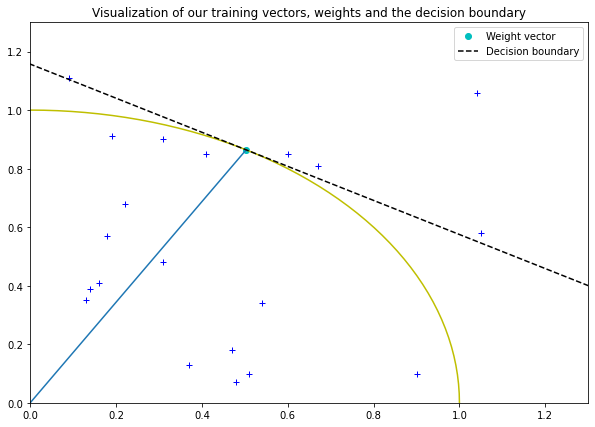

In [6]:
plt.figure(figsize = (10,7))
for k in range(len(X_train)):
    plt.plot(X_train[k][0], X_train[k][1], 'b+')
    plt.plot()

plt.plot(w[0], w[1], 'co', label = 'Weight vector')

v = np.linspace(0,np.pi/2) # 
plt.plot(np.cos(v), np.sin(v), 'y')
b = np.linspace(0, 1)
b_t = np.linspace(-3, 3)
plt.plot(b*w[0], b*w[1])

plt.plot(w[0] + -b_t *w[1], w[1] + b_t*w[0], 'k--', label = 'Decision boundary')

plt.xlim(0,1.3)
plt.ylim(0,1.3)
plt.title("Visualization of our training vectors, weights and the decision boundary")
plt.legend()


In [7]:
#   Create 1000 test vectors so that around half of them have length of more than 1
X_test = np.round(np.random.rand(1000,2)/0.8, 2) 
#    Create labels for those vectors. 1 means they are inside of the unit ball. -1 means they are outsight of it.
labels = []
for k in range(len(X_test)):
    if np.dot(X_test[k], X_test[k]) >= 1:
        labels.append(-1)
    else: labels.append(1)
labels = np.array(labels)
print("There are ", np.sum(labels > 0), "vectors inside of the ball.") 

There are  510 vectors inside of the ball.


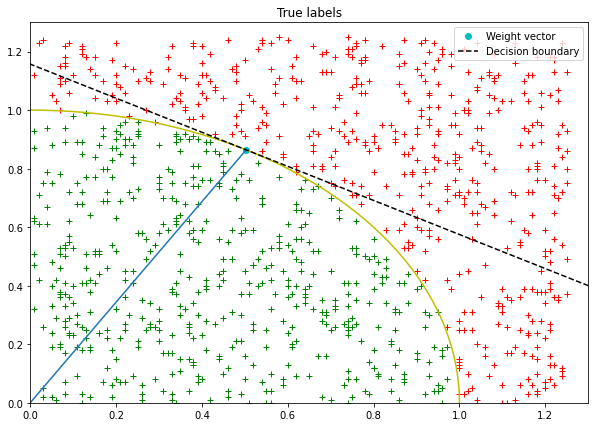

In [8]:
plt.figure(figsize = (10,7))
for k in range(len(X_test)):
    if labels[k] == 1:
        plt.plot(X_test[k][0], X_test[k][1], 'g+')
    if labels[k] == -1:
        plt.plot(X_test[k][0], X_test[k][1], 'r+')

plt.plot(w[0], w[1], 'co', label = 'Weight vector')

v = np.linspace(0,np.pi/2) # 
plt.plot(np.cos(v), np.sin(v), 'y')
b = np.linspace(0, 1)
b_t = np.linspace(-3, 3)
plt.plot(b*w[0], b*w[1])

plt.plot(w[0] + -b_t *w[1], w[1] + b_t*w[0], 'k--', label = 'Decision boundary')

plt.xlim(0,1.3)
plt.ylim(0,1.3)
plt.title("True labels")
plt.legend()

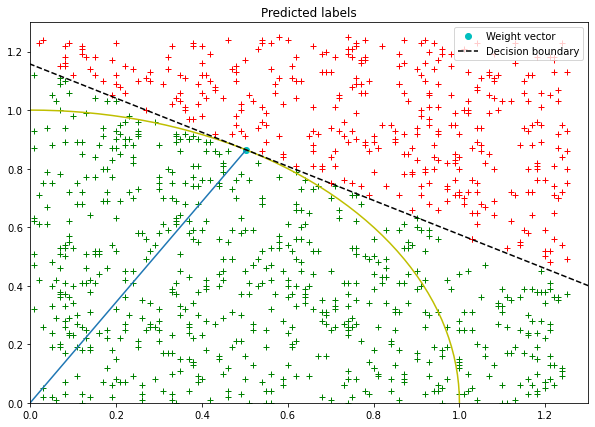

In [9]:
plt.figure(figsize = (10,7))
labels_predict = Perceptron.predict(X_test)  
for k in range(len(X_test)):
    if labels_predict[k] == 1:
        plt.plot(X_test[k][0], X_test[k][1], 'g+')
    if labels_predict[k] == -1:
        plt.plot(X_test[k][0], X_test[k][1], 'r+')

plt.plot(w[0], w[1], 'co', label = 'Weight vector')

v = np.linspace(0,np.pi/2) # 
plt.plot(np.cos(v), np.sin(v), 'y')
b = np.linspace(0, 1)
b_t = np.linspace(-3, 3)
plt.plot(b*w[0], b*w[1])

plt.plot(w[0] + -b_t *w[1], w[1] + b_t*w[0], 'k--', label = 'Decision boundary')

plt.xlim(0,1.3)
plt.ylim(0,1.3)
plt.title("Predicted labels")
plt.legend()


We see that our decision boundary holds true. What you have not seen here: training calculations will explode quickly. Always be aware of exploding and vanishing results. In the next chapter we will learn how the "Backpropagation algorithm" works.